## Продвинутое машинное обучение: ДЗ 1
## Кошелев Александр DS-21

### Часть 1

#### 1.1
Прокурор оценил вероятность виновности вероятностью принадленжости подсудимого к редкой группе крови группе крови. А должен был оценить вероятность виновности при условии принадлежности подсудимого к этой группе крови.

#### 1.2
Адвокат оценил вероятность невиновности вероятностью выбора подсудимого из множества людей с данной группой крови. А должен был оценить вероятность невиновности при условии принадлежности подсудимого в этой группе крови. То есть неверно рассматривать из всех людей в городе, стране, мире итд, необходимо рассматривать среди людей которые могли совершить претсупление

#### 1.3

Построим 2 графика с изменением вероятности False-Positive, False-Negative. p_1 вероятность ошибки False_Positive, p_2 - False-Negative. P_A - Вероятность появления  положительного теста. P_B - вероятность того что болен. P_AB - вероятность положительного теста при условии что болен. P_BA - вероятность того что болен при наличии положительного теста

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
p_1_default = 0.05
p_2_default = 0.05
P_B = 0.01

In [3]:
def get_posterior(p_1, p_2):
    P_B = 0.01
    P_A = p_1 * 0.99 + (1 - p_2) * 0.01
    P_AB = (1 - p_2)
    return P_AB * P_B / P_A

In [4]:
get_posterior(0.05, 0.05)

0.16101694915254236

In [5]:
p_list = np.linspace(0, 0.05, 20)

In [6]:
#Вероятности со снижением false-negative
p_apost_fn = [get_posterior(p_1_default, p_2_new) for p_2_new in p_list]
#Вероятности со снижением false-positive
p_apost_fp = [get_posterior(p_1_new, p_2_default) for p_1_new in p_list]

In [7]:
p_apost_fn, p_apost_fp

([0.1680672268907563,
  0.16769911504424778,
  0.16733067729083664,
  0.1669619131975199,
  0.16659282233052725,
  0.16622340425531912,
  0.16585365853658537,
  0.16548358473824315,
  0.16511318242343542,
  0.16474245115452932,
  0.1643713904931142,
  0.16399999999999998,
  0.16362827923521567,
  0.1632562277580071,
  0.1628838451268358,
  0.16251113089937666,
  0.1621380846325167,
  0.16176470588235292,
  0.1613909942041908,
  0.16101694915254236],
 [1.0,
  0.7847826086956522,
  0.6457960644007156,
  0.5486322188449849,
  0.47688243064729197,
  0.4217289719626168,
  0.37801047120418846,
  0.3425047438330171,
  0.31309627059843886,
  0.2883386581469648,
  0.2672094744633605,
  0.2489655172413793,
  0.23305358295674627,
  0.21905339805825239,
  0.20663995420721237,
  0.19555796316359694,
  0.18560411311053984,
  0.17661448140900196,
  0.16845543630424636,
  0.16101694915254236])

Text(0.5, 1.0, 'Вероятность того что болен при наличии положительного теста. Р_ВА')

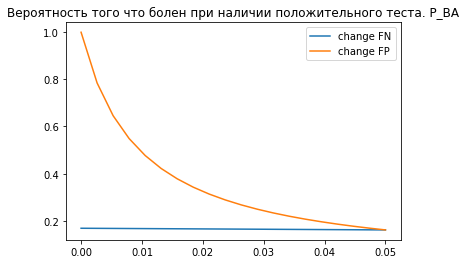

In [8]:
plt.plot(p_list, p_apost_fn, label='change FN')
plt.plot(p_list, p_apost_fp, label='change FP')
plt.legend()
plt.title('Вероятность того что болен при наличии положительного теста. Р_ВА')

Вывод: нужно снижать вероятность для false-positive, если хотят увеличить вероятность того что человек действительно болен при положительном тесте.
Но надо понимать, что если не снизить false-negative - 5% реально больных не будут выявлены. Что может закончиться печально.
В жизни все зависит целей, ресурсов и возможностей. И исходя из этого найти оптимальный вариант снижения обоих типов ошибки

## Часть 2

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns

palette = sns.color_palette()
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16, 4)

In [10]:
data = pd.read_csv('owid-covid-data.csv')

In [11]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


Отфильтруем только нужные данные

In [12]:
data = data[(data['location'] == 'Russia') & (data['date'] >= '2020-03-03')]

In [13]:
data = data.set_index('date')

<AxesSubplot:xlabel='date'>

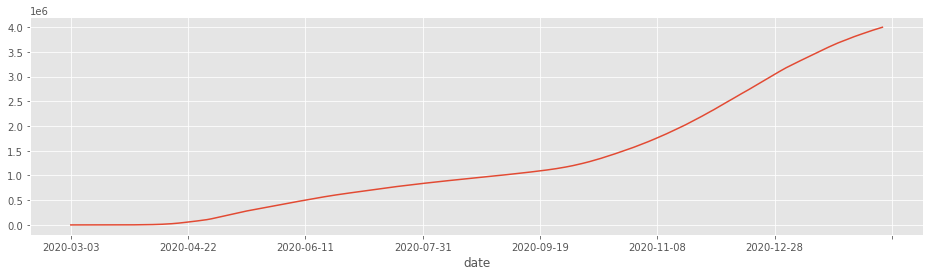

In [14]:
data['total_cases'].plot()

<AxesSubplot:xlabel='date'>

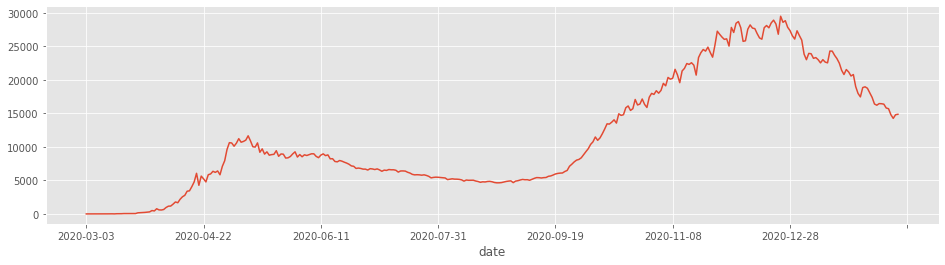

In [15]:
data['new_cases'].plot()

In [16]:
data['new_cases'] = data['new_cases'].replace(0, 1)

In [17]:
train = data.iloc[:50].copy()

In [18]:
test = data.iloc[50:].copy()

### 2.a

<AxesSubplot:xlabel='date'>

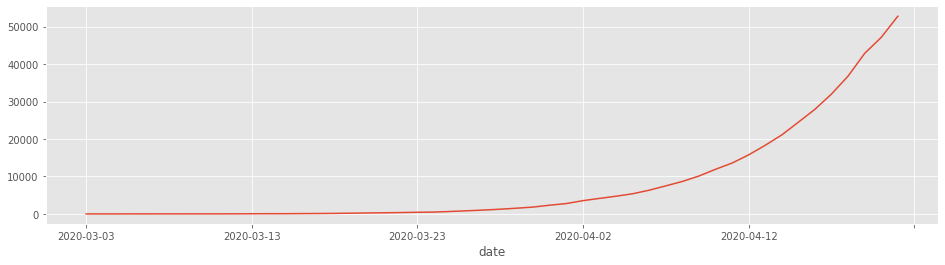

In [19]:
train['total_cases'].plot()

In [20]:
train['day_number'] = np.arange(0, 50, 1)

In [21]:
train['day_number_exp'] = np.exp(train['day_number'])

Нормализуем экспоненту номера дня для удобной визуализации

In [22]:
def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [23]:
# Нарисуем результат
def plot_predictions(xs, mu, x, points):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.set_xlim((xs[0], xs[-1]))
    ax.set_ylim((-2, 2))
    ax.plot(xs, true_curve(xs), label="Правильный ответ")
    ax.plot(xs, mu[1]*xs + mu[0], color="red", label="MAP гипотеза")
    ax.fill_between(xs, mu[1]*xs + mu[0] - .25, mu[1]*xs + mu[0] + .25, color=palette[1], alpha=.3, label="+- дисперсия шума")
    ax.fill_between(xs, np.mean(x, axis=0) - np.std(x, axis=0), np.mean(x, axis=0) + np.std(x, axis=0), color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.scatter(points[0], points[1], marker='*', s=200)
    ax.legend(fontsize=legend_fontsize)

In [24]:
cur_mu, cur_sigma = np.array([0.5, 0.5]), \
    2*np.array([[1, 0], [0, 1]])

In [25]:
for i in range(train.shape[0]):
    x, y = train['day_number_exp'].iloc[i], train['total_cases'].iloc[i]
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, x, y)

In [26]:
errors = []
for i in range(50):
    x = train['day_number_exp'].iloc[i]
    y = cur_mu[1]*x + cur_mu[0]
    errors.append(train['total_cases'].iloc[i] - y)

In [27]:
np.mean(errors), np.std(errors)

(3.9509470265743585, 10079.13151164957)

In [28]:
noize_disp = np.var(errors)

In [29]:
x = train['day_number_exp']

### 2.b
Параметры апостериорного распреления:

In [30]:
cur_mu, cur_sigma

(array([6.32201524e+03, 3.10947767e-17]),
 array([[ 1.30569312e-03, -9.36395517e-25],
        [-9.36395517e-25,  1.55264075e-44]]))

Дисперсия шума и его стандартное отклонение

In [31]:
noize_disp, np.sqrt(noize_disp)

(101588892.02912733, 10079.13151164957)

### 2.с

In [32]:
from datetime import datetime

In [33]:
# Число дней до 1 сентября
datetime(2020, 9, 1) - datetime(2020, 3, 3)

datetime.timedelta(days=182)

In [34]:
# Число дней до 1 июня
datetime(2020, 6, 1) - datetime(2020, 3, 3)

datetime.timedelta(days=90)

In [35]:
# Число дней до 1 мая
datetime(2020, 5, 1) - datetime(2020, 3, 3)

datetime.timedelta(days=59)

In [36]:
exp_1may = np.exp(59)
exp_1june = np.exp(90)
exp_1sept = np.exp(182)

In [37]:
my_w = np.random.multivariate_normal(cur_mu, cur_sigma, 50)
result_1may = []
result_1june = []
result_1sept = []
for i, w in enumerate(my_w):
    result_1may.append(w[0] + w[1]*exp_1may)
    result_1june.append(w[0] + w[1]*exp_1june)
    result_1sept.append(w[0] + w[1]*exp_1sept)
#     print(f'Iter: {i} 1 june estimated total cases {w[0] + w[1]*exp_1june}')
#     print(f'Iter: {i} 1 sept estimated total cases {w[0] + w[1]*exp_1sept}')

### Усредненные результаты 50-и экспонент на 1 июня и 1 сентября

In [38]:
np.mean(result_1may), np.mean(result_1june), np.mean(result_1sept)

(1306361977.7055442, 3.794812905132276e+22, 3.422021264511154e+62)

In [39]:
def sample_statistics(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = w[0] + w[1]*xs
    return res

In [40]:
x = np.arange(0, 52, 1)
x_exp = np.exp(x)

In [41]:
x_pred = sample_statistics(cur_mu, cur_sigma, x, n=100)

In [42]:
np.mean(x_pred, axis=0)

array([6322.01865589, 6322.01865589, 6322.01865589, 6322.01865589,
       6322.01865589, 6322.01865589, 6322.01865589, 6322.01865589,
       6322.01865589, 6322.01865589, 6322.01865589, 6322.01865589,
       6322.01865589, 6322.01865589, 6322.01865589, 6322.01865589,
       6322.01865589, 6322.01865589, 6322.01865589, 6322.01865589,
       6322.01865589, 6322.01865589, 6322.01865589, 6322.01865589,
       6322.01865589, 6322.01865589, 6322.01865589, 6322.01865589,
       6322.01865589, 6322.01865589, 6322.01865589, 6322.01865589,
       6322.01865589, 6322.01865589, 6322.01865589, 6322.01865589,
       6322.01865589, 6322.01865589, 6322.01865589, 6322.01865589,
       6322.01865589, 6322.01865589, 6322.01865589, 6322.01865589,
       6322.01865589, 6322.01865589, 6322.01865589, 6322.01865589,
       6322.01865589, 6322.01865589, 6322.01865589, 6322.01865589])

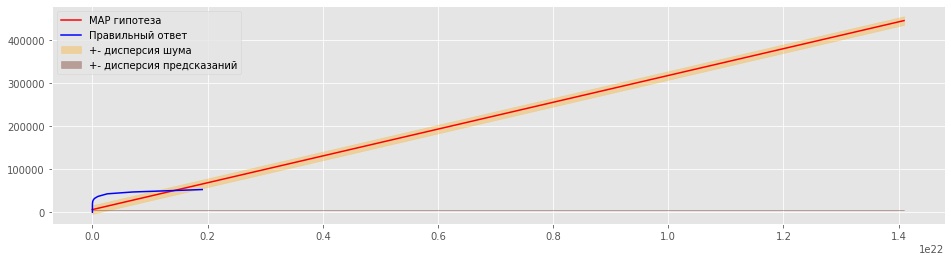

In [43]:
plt.plot(x_exp, cur_mu[1]*x_exp + cur_mu[0], color='red', label="MAP гипотеза")
plt.plot(train['day_number_exp'], train['total_cases'], color='blue', label="Правильный ответ")
plt.fill_between(x_exp, cur_mu[1]*x_exp + cur_mu[0] - np.sqrt(noize_disp), cur_mu[1]*x_exp + cur_mu[0]  + np.sqrt(noize_disp), color='orange', alpha=.3, label="+- дисперсия шума")
plt.fill_between(x_exp, np.mean(x_pred, axis=0) - np.std(x_pred, axis=0), np.mean(x_pred, axis=0) + np.std(x_pred, axis=0), color=palette[5], alpha=.5, label="+- дисперсия предсказаний")
plt.legend()

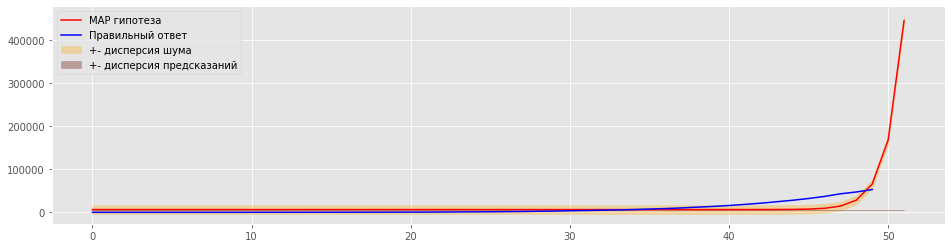

In [44]:
plt.plot(x, cur_mu[1]*x_exp + cur_mu[0], color='red', label="MAP гипотеза")
plt.plot(train['day_number'], train['total_cases'], color='blue', label="Правильный ответ")
plt.fill_between(x, cur_mu[1]*x_exp + cur_mu[0] - np.sqrt(noize_disp), cur_mu[1]*x_exp + cur_mu[0]  + np.sqrt(noize_disp), color='orange', alpha=.3, label="+- дисперсия шума")
plt.fill_between(x, np.mean(x_pred, axis=0) - np.std(x_pred, axis=0), np.mean(x_pred, axis=0) + np.std(x_pred, axis=0), color=palette[5], alpha=.5, label="+- дисперсия предсказаний")
plt.legend()

## Часть 3

### 3.a
Для решения предлагаю количество дней нормализовать с помощью Standart Scaler. Затем для получения из этого нужного признака использовать значение функции распределения нормального распределения с параметрами 0, 1 от значения преобразованного дня. Для стандартизации использовал интервал 100 дней т.к. по данным не похоже, что через 50 дней пришло насыщение

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
poly = PolynomialFeatures(2)

In [47]:
st_sc = StandardScaler()

In [48]:
st_sc.fit((np.arange(0, 100, 1)**2).reshape(-1, 1))

StandardScaler()

In [49]:
train['day_number_for_sigm'] = multivariate_normal.cdf(st_sc.transform(train[['day_number']]**2), mean=0, cov=1)

### 3.b

In [67]:
cur_mu, cur_sigma = np.array([0, 0]), \
    2*np.array([[1, 0], [0, 1]])

In [68]:
for i in range(train.shape[0]):
    x, y = train['day_number_for_sigm'].iloc[i], train['total_cases'].iloc[i]
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, x, y)

In [69]:
x_sigm = st_sc.transform((np.arange(0, 100, 1)**2).reshape(-1, 1))

In [70]:
x_sigm = multivariate_normal.cdf(x_sigm.reshape(1, -1)[0], mean=0, cov=1)

In [71]:
poly.fit_transform([[2]])[0]

array([1., 2., 4.])

In [72]:
errors = []
for i in range(50):
    x = train['day_number_for_sigm'].iloc[i]
    y = cur_mu[1]*x + cur_mu[0]
    errors.append(train['total_cases'].iloc[i] - y)

np.mean(errors), np.std(errors)

noize_disp = np.var(errors)

In [73]:
np.sqrt(noize_disp)

5108.528126507617

In [74]:
x_pred = sample_statistics(cur_mu, cur_sigma, x_sigm, n=100)  

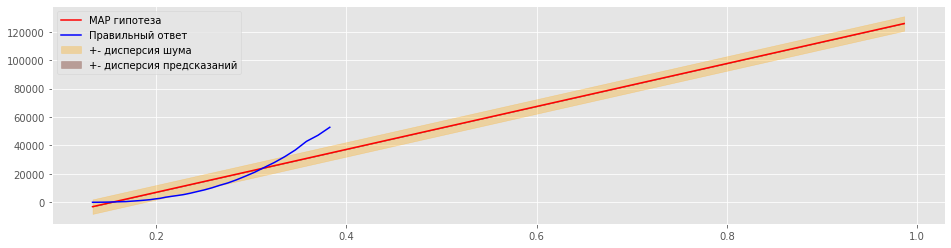

In [75]:
plt.plot(x_sigm, cur_mu[1]*x_sigm + cur_mu[0], color='red', label="MAP гипотеза")
plt.plot(train['day_number_for_sigm'], train['total_cases'], color='blue', label="Правильный ответ")
plt.fill_between(x_sigm, cur_mu[1]*x_sigm + cur_mu[0] - np.sqrt(noize_disp), cur_mu[1]*x_sigm + cur_mu[0]  + np.sqrt(noize_disp), color='orange', alpha=.3, label="+- дисперсия шума")
plt.fill_between(x_sigm, np.mean(x_pred, axis=0) - np.std(x_pred, axis=0), np.mean(x_pred, axis=0) + np.std(x_pred, axis=0), color=palette[5], alpha=.5, label="+- дисперсия предсказаний")
plt.legend()

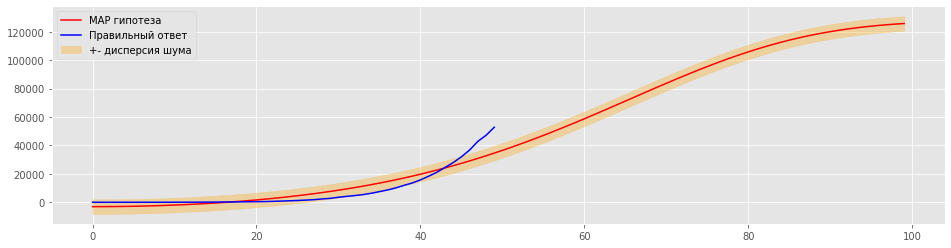

In [77]:
plt.plot(np.arange(0, 100, 1), cur_mu[1]*x_sigm + cur_mu[0], color='red', label="MAP гипотеза")
plt.plot(train['day_number'], train['total_cases'], color='blue', label="Правильный ответ")
plt.fill_between(np.arange(0, 100, 1), cur_mu[1]*x_sigm + cur_mu[0] - np.sqrt(noize_disp), cur_mu[1]*x_sigm + cur_mu[0]  + np.sqrt(noize_disp), color='orange', alpha=.3, label="+- дисперсия шума")
plt.legend()

### 3.c

In [60]:
cur_mu

array([-23175.22055234, 150999.68863491])

In [61]:
my_w = np.random.multivariate_normal(cur_mu, cur_sigma, 30)
res = [np.zeros((30, 3))][0]
x_for_pred = st_sc.transform((np.array([59, 90, 182])**2).reshape(-1, 1))
x_for_pred = multivariate_normal.cdf(x_for_pred, mean=0, cov=1)
for i,w in enumerate(my_w):
    res[i, 0] = w[0] + w[1]*x_for_pred[0]
    res[i, 1] = w[0] + w[1]*x_for_pred[1]
    res[i, 2] = w[0] + w[1]*x_for_pred[2]

In [62]:
x_for_pred = st_sc.transform(np.array([59, 90, 182]).reshape(-1, 1))
x_for_pred = multivariate_normal.cdf(x_for_pred, mean=0, cov=1)

In [63]:
# Прогнозы на 59, 90, 182 дни. 90% процентиль пессимистичный
np.quantile(res, 0.9, axis=0)

array([ 56350.27364929, 120054.73117465, 127824.71014651])

In [64]:
# Прогнозы на 59, 90, 182 дни. 10% процентиль оптимистичный
np.quantile(res, 0.1, axis=0)

array([ 56349.96463604, 120054.05566544, 127823.9899361 ])

In [65]:
data['total_cases'].loc['2020-05-01'], data['total_cases'].loc['2020-06-01'], data['total_cases'].loc['2020-09-01']

(114431.0, 414328.0, 997072.0)

### Вывод
Вывод:
На рост числа заболевших влияет большое количество факторов и предсказывать ее по одному признаку(номер дня) не является хорошим решением. Но на самом деле, если у нас нет других данных работаем с тем что есть :)
Видно, что прогнозные значения сигмоидальной модели ниже реальных. Но все равно я бы предложил вводить карантин, так как вначале непонятно как лечить болезнь, низкий коечный фонд. Карантин дает запас времени для поиска решений. Все таки приоритет человеческой жизни важнее всего. 
Но при этом необходимо было бы оценить как карантин повлияет на другие сферы жизни, чтобы не привело к бОльшим проблемам, чем пандемия